# 워드 클라우드 - SOYNLP version

In [1]:
import re, joblib

In [2]:
with open('data/gift.txt', encoding='utf-8') as file:
    gift_text = file.read()

In [3]:
gift_text[:100]

'\n반지!목걸이!!!!!!!!\n커플 가디건이나 커플 모자는 어떠신지요 :-)\n몇개 추천제품들 투척하고 갑니다 ㅎㅎ\n더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건\nCOUPAN'

- 텍스트 전처리

In [4]:
new_gift_text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', gift_text)
new_gift_text[:100]

' 반지 목걸이         커플 가디건이나 커플 모자는 어떠신지요     몇개 추천제품들 투척하고 갑니다 ㅎㅎ 더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건       '

- 명사 추출

In [5]:
from soynlp.tokenizer import NounLMatchTokenizer

noun_scores = joblib.load('data/noun_scores.pkl')
n_tokenizer = NounLMatchTokenizer(noun_scores)
gift_list = n_tokenizer.tokenize(new_gift_text)
len(gift_list)

16655

In [6]:
gift_list[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '어떠', '몇개', '추천제품들', '투척']

- 한글 폰트 사용

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 필요없는 단어 제거

In [8]:
import nltk

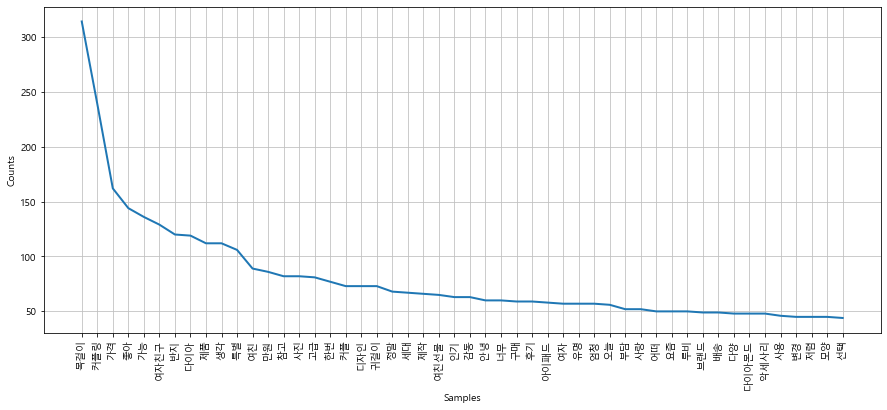

In [11]:
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)            # 많이 사용된 단어 50개 보여주기
plt.show()

In [10]:
# stop_list = ['선물','추천']
stop_list = ['선물','추천']
gift_list = [gift for gift in gift_list if gift not in stop_list]

In [ ]:
gl = []
for gift in gift_list:
    if gift not in stop_list:
        gl.append(gift)
gift_list = gl